# Lecture 17 - Random Numbers in Python & Monte Carlo - HW 8

## 1) Random Numbers and Radio Activity

The isotope $^{213}$Bi decays to stable $^{209}$Bi via one of two different routes, with probabilities and
half-lives thus

<img src="Decay9.jpg" alt="Decay process for Bi213 to Bi209" title="Bismuth Decay" />

(Technically, $^{209}$Bi isnt really stable, but it has a half-life of more than $10^{19}$ years, a billion
times the age of the universe, so it might as well be.)

Starting with a sample consisting of 10,000 atoms of $^{213}$Bi, simulate the decay of the atoms
by dividing time into slices of length $\delta t = 1$s each and on each step doing
the following:

1. For each atom of $^{209}$Pb in turn, decide at random, with the appropriate probability, whether it decays or not. (The probability can be calculated from $p(t) = 1 − 2t/\tau $, where $\tau$ is the half life.) Count the total number that decay, subtract it from the number of $^{209}$Pb atoms, and add it to the number of $^{209}$Bi atoms.

2. Now do the same for $^{209}$Tl, except that decaying atoms are subtracted from the total for $^{209}$Tl and added to the total for $^{209}$Pb.

3. For $^{213}$Bi the situation is more complicated: when a $^{213}$Bi atom decays you have to decide at random with the appropriate probability the route by which it decays. Count the numbers that decay by each route and add and subtract accordingly.

Note that you have to work up the chain from the bottom like this, not down from the top,
to avoid inadvertently making the same atom decay twice on a single step.

Keep track of the number of atoms of each of the four isotopes at all times for 20,000 seconds
and make a single graph showing the four numbers as a function of time on the same axes.



818
12
29
9141


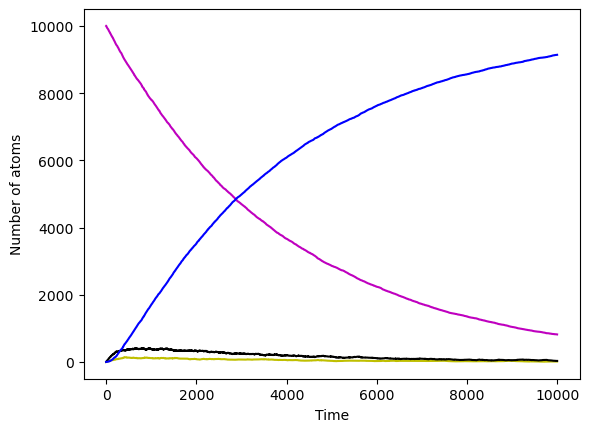

In [40]:
# Write Code Here

import numpy as np
from numpy import arange
from pylab import plot,xlabel,ylabel,show

# Constants
NBi213 = 10000
NTl = 0
NPb = 0        
NBi209 = 0

Bitau = 46*60
Pbtau = 3.3*60          # Half life 
Tltau = 2.2*60

h = 1.0                 # Size of time-step in seconds
q = 1 - 2**(-h/Bitau)
p = 1 - 2**(-h/Pbtau)   # Probability of decay in one step
r = 1 - 2**(-h/Tltau)
tmax = 10000             # Total time

# Lists of plot points
tpoints = arange(0.0,tmax,h) # make time array
Bi213points = []
Tlpoints = []
Pbpoints = [] 
Bi209points = [] 


# Main loop
for t in tpoints:    # for time 0-1000 sec
    Bi213points.append(NBi213)
    Tlpoints.append(NTl)
    Pbpoints.append(NPb) 
    Bi209points.append(NBi209) 

    # Calculate the number of atoms that decay
    decay = 0
    decayTl = 0
    decayPb = 0
    
    for j in range(NPb):
        if np.random.random() < r:
            decayPb += 1
    NPb -= decayPb
    NBi209 += decayPb
    


    
    for i in range(NTl): # determine number of atoms that decay
        if np.random.random() < p:
            decayTl += 1
    NTl -= decayTl
    NPb += decayTl

    for m in range(NBi213):
        if np.random.random() < q:
            decay += 1 
            if (np.random.random() > .209):
                NPb += 1
                NBi213 -= 1
            else:
                NTl += 1
                NBi213 -= 1

                
print(NBi213)
print(NTl)
print(NPb)
print(NBi209)   


# Make the graph
plot(tpoints,Bi213points, c = 'm')
plot(tpoints,Tlpoints, c = 'y')
plot(tpoints,Pbpoints, c='k')
plot(tpoints,Bi209points, c='b') 
xlabel("Time")
ylabel("Number of atoms")
show()




## 2) Lets Make a Deal
Monte Carlo methods are often useful to ensure that our thinking is reasonable. A good
example of this kind of use is to investigate a simple problem that generated much attention
several years ago and for which many mathematicians obtained an incorrect solution.

The problem was the analysis of the optimal strategy in a television game show popular at
the time. The show was Lets Make a Deal with host Monty Hall. At some point in the show,
a contestant was given a choice of selecting one of three possible items, each concealed behind
one of three closed doors. The items varied considerably in value.

After the contestant made a choice but before the chosen door was opened, the
host, who knew where the most valuable item was, would open one of the doors
not selected and reveal a worthless item.

**The host would then offer to let the contestant select a different door from what was originally
selected. The question, of course, is should the contestant switch?**

<img src="Monty_Hall_Problem.jpg" alt="Decay process for Bi213 to Bi209" title="Bismuth Decay" />



Much interest in this problem was generated when it was analyzed by a popular magazine
writer, Marilyn vos Savant, who concluded that the optimal strategy is to switch. This
strategy is counterintuitive to many mathematicians, who would say that there is nothing to
be gained by switching; that is, that the probability of improving the selection is 0.5. Study
this problem by Monte Carlo methods. Be careful to understand all of the assumptions

**Write a code that implement this test for 1000 “games”, 500 where the contestant choose to KEEP their choice of door, and 500 where contestant chooses to CHANGE their choice of door:**


## Determine if there is probability of improving the selection by switching, and if so by how much?



In [169]:
# Import the random module
import numpy as np


doors = 3
sims = 500
wins = 0


for i in range(sims):
   
    car = random.randint(1, doors)
    pick = random.randint(1, doors)
      
    if car == pick:
        host = random.choice([d for d in range(1, doors + 1) if d != car])
    
    else:
        host = [d for d in range(1, doors + 1) if d != car and d != pick][0]
        
#Delete pound sign to use either, random, switch, or stay
#Random decision on switch or stay
    decision = random.randint(0, 1)
    
#Decision to stay on door instead of switching
    #decision = 0
    
#Decision to switch doors instead of staying
    #decision = 1
    
    
    if decision == 0:
        final = pick    
    else:
        final = [d for d in range(1, doors + 1) if d != pick and d != host][0]
       
    if final == car:
        wins += 1
    
    #else:
        #print('You lose')


print('Total amount of wins', wins)
win_perc = (wins/sims) * 100
print(f"Win percentage is {win_perc}%")

Total amount of wins 254
Win percentage is 50.8%


In [167]:
# Game for you to play where you select the door, and whether or not you choose to switch or not.
# I dont think this game works super well, it definintely doesnt work everytime you use it, but sometimes it does.
# I would try and troubleshoot it but i dont want to risk forgetting to turn in the assignment.


import numpy as np

doors = 3
sims = 500



for i in range(sims):
   
    car = random.randint(1, doors)

        
ppick = print(int(input('Input a door number out of 1, 2, or 3: ')))

if car != ppick:
    print('Lets open a door without the prize!')

for j in range(1, 3):
    if j not in (car, ppick):
        print(j)
    
st_sw = print(input('Stay, or switch: '))

print('The car is behind door number')
print(car)

print('Did you win?')




        

        
        


Input a door number out of 1, 2, or 3: 1
1
Lets open a door without the prize!
2
Stay, or switch: switch
switch
The car is behind door number
1
Did you win?
